# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
#print(json.dumps(btc_response_data, indent=4))

# Fetch current ETH price
etc_response_data = requests.get(eth_url).json()
#print(json.dumps(etc_response_data, indent=4))


# Compute current value of my crpto
my_btc_value = btc_response_data['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = etc_response_data['data']['1027']['quotes']['USD']['price'] * my_eth
#print(json.dumps(my_btc_value, indent=4))
#print(json.dumps(my_eth_value, indent=4))

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13614.13
The current value of your 5.3 ETH is $1949.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3589312  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62467863

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23576.00
The current value of your 50 SPY shares is $17362.50


### Savings Health Analysis

In [11]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

value_data = {
    "amount": [crypto_value, shares_value]
}

tickers = ["crypto", "shares"]

df_savings = pd.DataFrame(value_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
crypto,15563.419
shares,40938.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfab111590>],
      dtype=object)

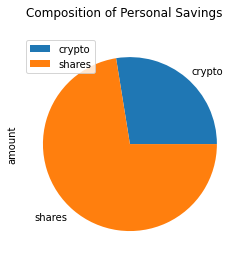

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings", subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate saving health
my_diff = emergency_fund - total_savings

if total_savings > emergency_fund:
    print ("Congratulations for having enough money in this fund.")
elif total_savings == emergency_fund:
    print ("Congratulations on reaching your financial goal.")
else:
    print (f"Your are ${my_diff} from reaching the goal.")

Congratulations for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995465,0.994221,1.000692,1.007207,1.004874,0.992741,1.008954,0.996222,1.015881,0.992144,...,0.991471,1.009585,0.994937,1.004430,1.004236,1.003717,0.999475,0.994347,1.006767,1.000070
2,0.997784,0.999328,1.001347,1.012076,0.996064,1.002124,1.014701,0.995579,1.019040,0.987986,...,0.998615,1.008853,1.005430,1.001133,1.017641,0.995977,0.990809,0.997985,0.999995,0.995852
3,0.998409,1.002601,0.993583,1.015847,0.997232,1.015401,1.024349,1.003876,1.016801,0.987863,...,0.997823,1.011208,0.995739,1.007498,1.009421,1.011199,0.996090,1.002584,0.995551,1.003768
4,1.003531,1.011628,0.989003,1.014856,1.000765,1.023478,1.022309,0.988574,1.030976,0.988677,...,1.005769,1.014290,0.981733,1.007948,1.014551,1.010275,0.989273,1.000870,1.000566,0.994828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.615066,2.674937,4.064173,8.647415,32.438097,5.095805,6.273216,9.009532,10.111785,12.468492,...,3.794262,3.157942,10.397126,7.674985,7.683619,17.534727,24.536032,4.212807,9.425506,4.241994
7557,12.559049,2.672775,4.092059,8.606592,32.426131,5.051579,6.334937,8.977722,10.086378,12.395559,...,3.779495,3.113911,10.266467,7.674032,7.813937,17.640723,24.814254,4.203192,9.332414,4.229047
7558,12.643975,2.709635,4.094966,8.653386,32.530771,5.124894,6.340287,8.999672,10.158598,12.576064,...,3.795192,3.114661,10.307226,7.622916,7.788551,17.398348,24.662669,4.084740,9.275539,4.197367
7559,12.579248,2.694013,4.084774,8.703224,32.536084,5.119659,6.363767,8.971791,10.295130,12.584249,...,3.805014,3.091233,10.184221,7.654489,7.804639,17.234412,24.918711,4.091970,9.309421,4.191719


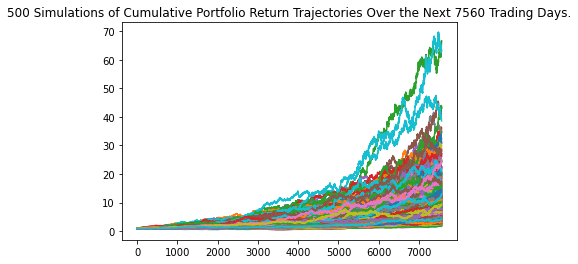

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

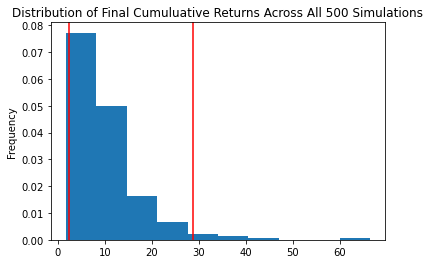

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.984953
std               7.595503
min               1.712571
25%               5.071851
50%               8.195596
75%              12.431978
max              66.456665
95% CI Lower      2.376404
95% CI Upper     28.795398
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47528.09 and $575907.96


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71292.13 and $863861.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

# Set number of simulations
num_sims = 500

MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

MC_fiveyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001367,1.003971,0.992886,1.012201,1.021878,0.987967,0.994880,0.999311,0.996651,1.006991,...,1.012290,0.981792,0.995875,0.986283,1.008197,1.006204,1.002196,0.996635,1.003071,0.986377
2,0.980790,1.006488,1.012101,1.004969,1.012535,0.981124,0.994570,0.990391,0.996832,1.008533,...,1.013338,0.990585,1.009305,1.003774,1.011054,1.017580,0.995196,1.005353,1.001559,0.989317
3,0.980698,0.995779,1.012662,0.992430,1.001317,0.972873,0.992715,0.993382,1.011514,1.009555,...,1.006684,0.982361,1.011679,0.998702,1.007906,1.018813,1.002624,1.002825,1.004239,0.969670
4,0.978797,0.981330,0.992739,0.998336,1.023652,0.979134,0.995916,0.981773,1.004274,1.002275,...,1.018725,0.996168,1.026140,1.006085,1.025896,1.020442,1.009233,1.003488,0.998398,0.960311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.685717,1.405586,1.793535,1.132113,0.726155,0.843704,0.892875,0.884589,1.374406,1.442566,...,1.570160,2.187388,1.632046,1.204889,0.900416,2.263006,1.441974,1.596379,1.537007,1.429586
1257,1.684454,1.426714,1.784470,1.121615,0.734603,0.835247,0.890618,0.896814,1.368705,1.430375,...,1.595519,2.208445,1.623527,1.197782,0.891152,2.244565,1.455955,1.621096,1.523548,1.431090
1258,1.680730,1.422912,1.776588,1.122664,0.741576,0.832123,0.864199,0.904550,1.380198,1.421356,...,1.598569,2.198244,1.591547,1.184937,0.880151,2.238226,1.471284,1.613926,1.545818,1.444994
1259,1.655936,1.427393,1.783619,1.142995,0.734594,0.833372,0.874311,0.895296,1.383289,1.439352,...,1.602166,2.203791,1.586650,1.177460,0.896252,2.261745,1.482164,1.642093,1.542118,1.432593


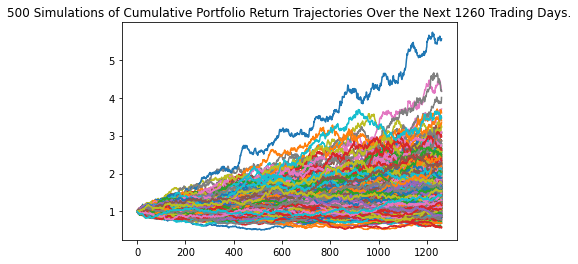

In [27]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

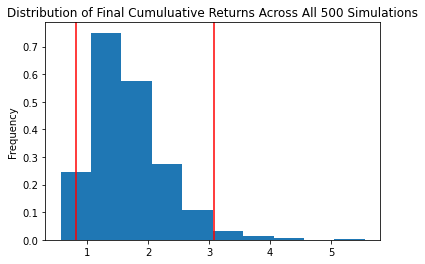

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              9.984953
std               7.595503
min               1.712571
25%               5.071851
50%               8.195596
75%              12.431978
max              66.456665
95% CI Lower      2.376404
95% CI Upper     28.795398
Name: 7560, dtype: float64


In [30]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $142584.26 and $1727723.87


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Set number of simulations
# Set start and end dates of ten years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

# Set number of simulations
num_sims = 500

MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

MC_tenyear.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005151,1.020417,1.013372,0.980975,1.000982,1.005823,0.997292,1.013409,1.006042,1.000321,...,1.003356,1.000138,1.007161,1.000065,0.986668,0.997203,1.002338,0.989977,0.999278,0.994268
2,1.011179,1.021945,1.023419,0.990542,1.008664,1.011421,1.008555,1.017923,1.010958,0.990713,...,0.994237,1.000575,1.002712,1.010107,0.978862,0.984517,0.999439,1.006727,0.992330,0.992037
3,0.998406,1.024862,1.008501,0.986291,0.999167,1.013915,1.006781,1.021244,1.007305,0.994975,...,0.997436,1.001725,1.010178,1.016222,0.996932,0.985654,0.995936,1.019067,1.000734,0.996054
4,1.004839,1.025838,1.010939,0.980555,0.994798,0.994374,1.014114,1.025867,0.992723,0.999615,...,1.005682,1.003669,1.005207,1.023657,0.995149,0.990582,0.993625,1.021187,1.005920,1.001532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.763174,1.261055,1.703026,1.845807,1.397757,2.049694,2.186821,1.623280,1.749774,2.219773,...,1.143399,2.768313,3.243457,2.291097,2.283205,1.395385,1.560567,1.903198,2.641366,2.659956
2517,1.791849,1.268036,1.709249,1.847387,1.398461,2.083542,2.171281,1.631619,1.764533,2.233392,...,1.159797,2.715992,3.210281,2.261084,2.280732,1.415027,1.562238,1.890794,2.648207,2.705567
2518,1.826818,1.252135,1.719692,1.862407,1.433378,2.098263,2.192260,1.635254,1.783854,2.229393,...,1.164151,2.718918,3.247672,2.246124,2.297179,1.402856,1.559936,1.904137,2.644561,2.638235
2519,1.819747,1.260013,1.703602,1.815720,1.420925,2.081756,2.207974,1.664975,1.767265,2.232566,...,1.170306,2.725001,3.226766,2.272315,2.277726,1.394632,1.570283,1.896563,2.667369,2.621015


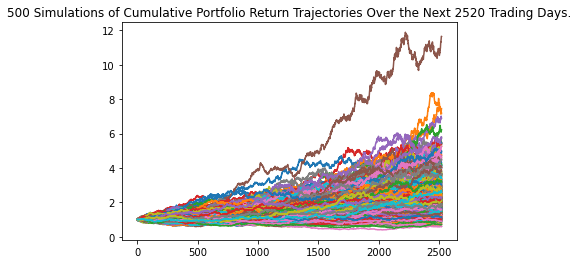

In [33]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

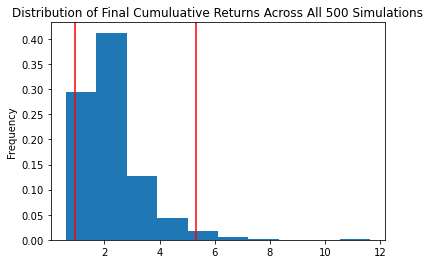

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.280462
std               1.126913
min               0.597943
25%               1.581792
50%               2.060227
75%               2.676648
max              11.647055
95% CI Lower      0.916528
95% CI Upper      5.317233
Name: 2520, dtype: float64


In [36]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $54991.68 and $319034.0
